In [39]:
#Import librairies

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api  as sm
import matplotlib.pyplot as plt

In [41]:
#Import WHO Life Expectancy dataset and define as df

In [42]:
df = pd.read_csv(r"C:\Users\Owner\Desktop\data\Lin Reg\whodata.csv")

In [5]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
#Redifne df after dropping missing values from imprted dataset

In [43]:
df_who = df.dropna(how='any')

In [8]:
df_who

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
#Check index of columns to see how they are written as strings

In [10]:
df_who.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
#Define X and Y variables

In [12]:
X = sm.add_constant(df_who['GDP'])
Y = df_who['Life expectancy ']

In [13]:
#Visualize regression model through seaborn

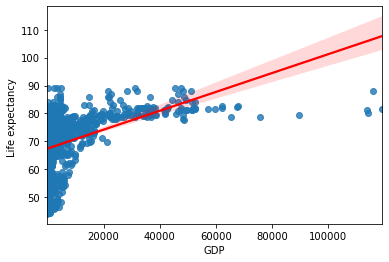

In [14]:
sns.regplot(x="GDP", y="Life expectancy ", data=df_who, line_kws={'color': 'red'});

In [15]:
#Run multiple regression using statsmodel

In [16]:
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     398.4
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.50e-79
Time:                        09:23:39   Log-Likelihood:                -5746.3
No. Observations:                1649   AIC:                         1.150e+04
Df Residuals:                    1647   BIC:                         1.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.4193      0.216    311.942      0.000      66.995      67.843
GDP            0.0003   1.69e-05     19.959      0.000       0.000       0.000
==============================================================================
Omnibus:                      150.538   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.528
Skew:                          -0.804   Prob(JB):                     2.57e-42
Kurtosis:                       3.452   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Creating a dummy variable for the variable "Status"

In [ ]:
#This categorieze whether a state in dataset is developed (0) or devoloping (1)

In [44]:
dummies = pd.get_dummies(df_who['Status'])

In [45]:
dummies

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


In [54]:
dummies.Developed

0       0
1       0
2       0
3       0
4       0
       ..
2933    0
2934    0
2935    0
2936    0
2937    0
Name: Developed, Length: 1649, dtype: uint8

In [55]:
dummies.Developing

0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Developing, Length: 1649, dtype: uint8

In [20]:
#Defining new variables

In [56]:
X1 = sm.add_constant(dummies.Developed)
Y1 = df_who['Life expectancy ']

In [57]:
#Run regression using statsmodel

In [58]:
results = sm.OLS(Y1, X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     401.7
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           3.92e-80
Time:                        10:01:01   Log-Likelihood:                -5745.0
No. Observations:                1649   AIC:                         1.149e+04
Df Residuals:                    1647   BIC:                         1.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6873      0.210    321.801      0.000      67.275      68.100
Developed     11.0044      0.549     20.042      0.000       9.927      12.081
==============================================================================
Omnibus:                      108.868   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.469
Skew:                          -0.677   Prob(JB):                     7.69e-29
Kurtosis:                       3.223   Cond. No.                         2.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Redifine variables

In [60]:
X2 = sm.add_constant(dummies.Developing)
Y2 = df_who['Life expectancy ']

In [ ]:
#Run regression model using statsmodel

In [61]:
results = sm.OLS(Y2, X2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     401.7
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           3.92e-80
Time:                        10:03:16   Log-Likelihood:                -5745.0
No. Observations:                1649   AIC:                         1.149e+04
Df Residuals:                    1647   BIC:                         1.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6917      0.507    155.156      0.000      77.697      79.687
Developing   -11.0044      0.549    -20.042      0.000     -12.081      -9.927
==============================================================================
Omnibus:                      108.868   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.469
Skew:                          -0.677   Prob(JB):                     7.69e-29
Kurtosis:                       3.223   Cond. No.                         5.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Redifine variables

In [62]:
X3 = sm.add_constant(dummies.Developed)
Y3 = df_who['GDP']

In [ ]:
#Run regression model using statsmodel

In [63]:
results = sm.OLS(Y3, X3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     506.0
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           6.13e-98
Time:                        10:05:28   Log-Likelihood:                -17533.
No. Observations:                1649   AIC:                         3.507e+04
Df Residuals:                    1647   BIC:                         3.508e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3259.3952    267.666     12.177      0.000    2734.394    3784.397
Developed   1.572e+04    698.708     22.495      0.000    1.43e+04    1.71e+04
==============================================================================
Omnibus:                     1400.075   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51540.823
Skew:                           3.792   Prob(JB):                         0.00
Kurtosis:                      29.318   Cond. No.                         2.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Redifine variables

In [65]:
X3 = sm.add_constant(dummies.Developing)
Y3 = df_who['GDP']

In [ ]:
#Run regression model using statsmodel

In [66]:
results = sm.OLS(Y3, X3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     506.0
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           6.13e-98
Time:                        10:07:50   Log-Likelihood:                -17533.
No. Observations:                1649   AIC:                         3.507e+04
Df Residuals:                    1647   BIC:                         3.508e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.898e+04    645.405     29.403      0.000    1.77e+04    2.02e+04
Developing -1.572e+04    698.708    -22.495      0.000   -1.71e+04   -1.43e+04
==============================================================================
Omnibus:                     1400.075   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51540.823
Skew:                           3.792   Prob(JB):                         0.00
Kurtosis:                      29.318   Cond. No.                         5.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""